In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
p = sns.color_palette()


In [3]:
2.5171267342473382 / (2.5171267342473382+7.087836849232511)

0.2620652033055799

In [4]:
sub_lgbm_1 = pd.read_csv('Sub-LGBM-1.txt', sep='\t', 
                             header=None, 
                             names=['user_id', 'photo_id', 'click_probability'])

In [5]:
sub_lgbm_9 = pd.read_csv('Sub-LGBM-9.txt', sep='\t', 
                             header=None, 
                             names=['user_id', 'photo_id', 'click_probability'])

In [6]:
sub_lgbm_10 = pd.read_csv('Sub-LGBM-10.txt', sep='\t', 
                             header=None, 
                             names=['user_id', 'photo_id', 'click_probability'])

In [7]:
sub_lgbm_11 = pd.read_csv('Sub-LGBM-11.txt', sep='\t', 
                             header=None, 
                             names=['user_id', 'photo_id', 'click_probability'])

In [8]:
sub_catboost_1 = pd.read_csv('Sub-CATBOOST-1.txt', sep='\t', 
                             header=None, 
                             names=['user_id', 'photo_id', 'click_probability'])

In [9]:
def plot_data_cut(df, col, n_bins=20):
    quartiles = pd.cut(df[col], n_bins)
    grouped = df.groupby(quartiles)
    
    plt.figure(figsize=(30,15)) 
    plt.xlabel(col)
    plt.ylabel('counts in ' + col)
    nums_of_col = grouped.size()
    nums_of_col.plot.bar()

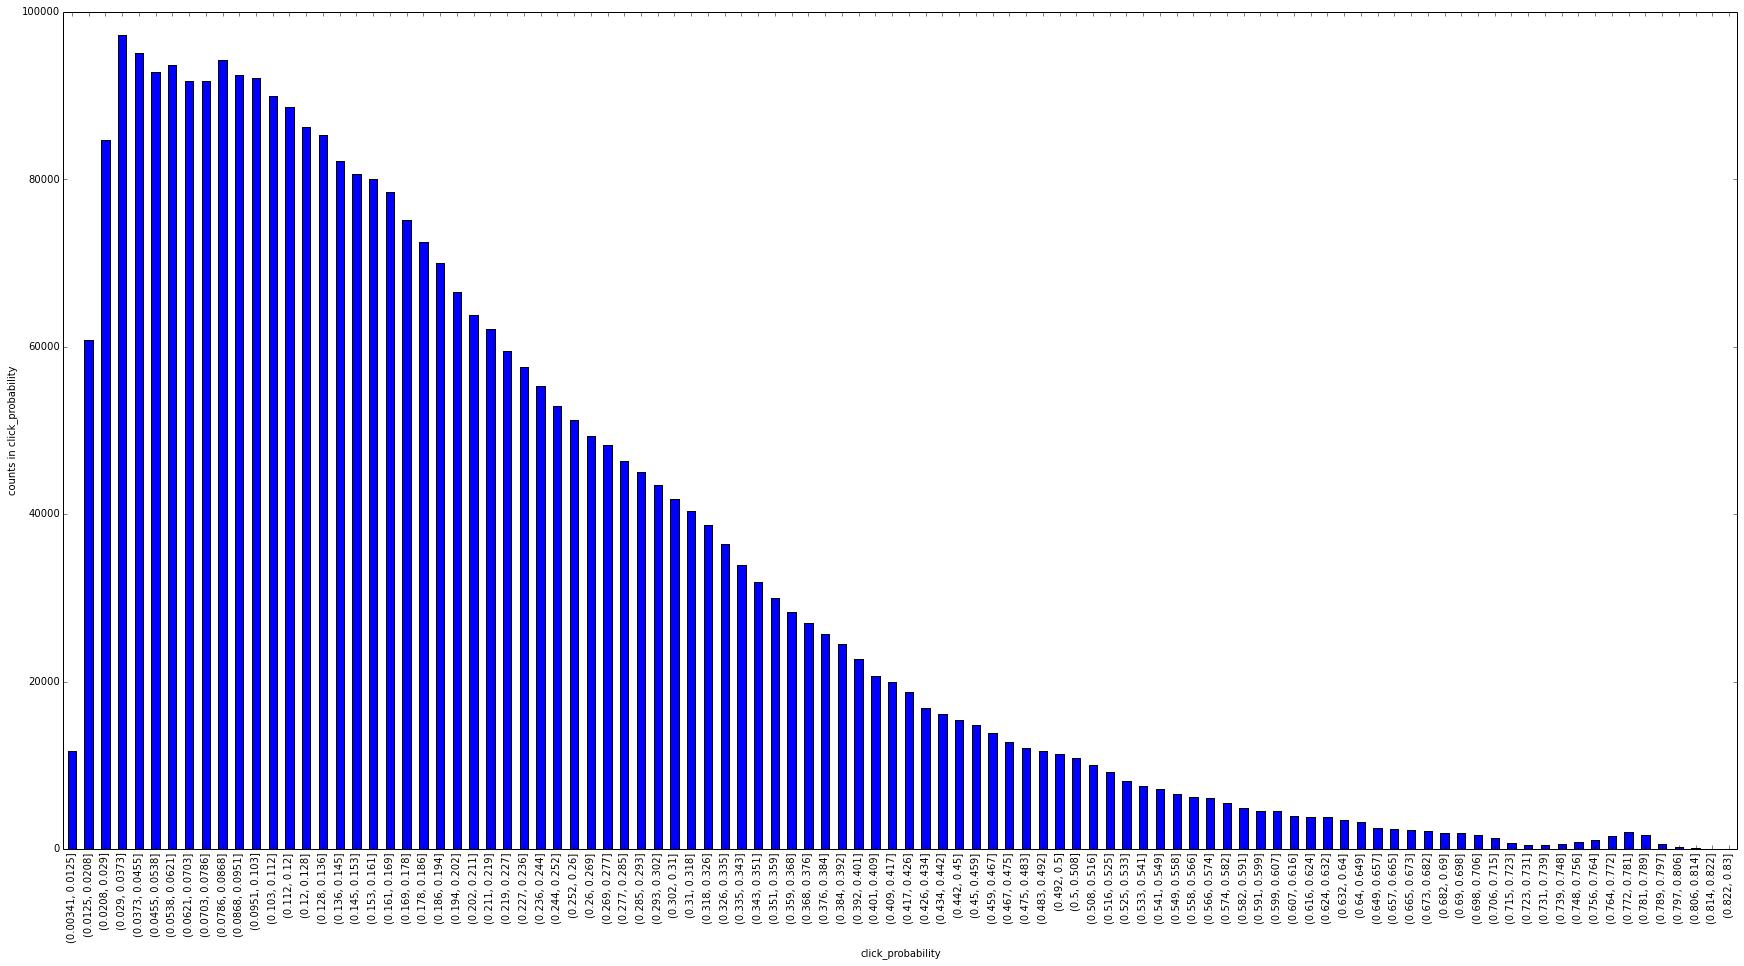

In [10]:
plot_data_cut(sub_lgbm_1, 'click_probability', 100)

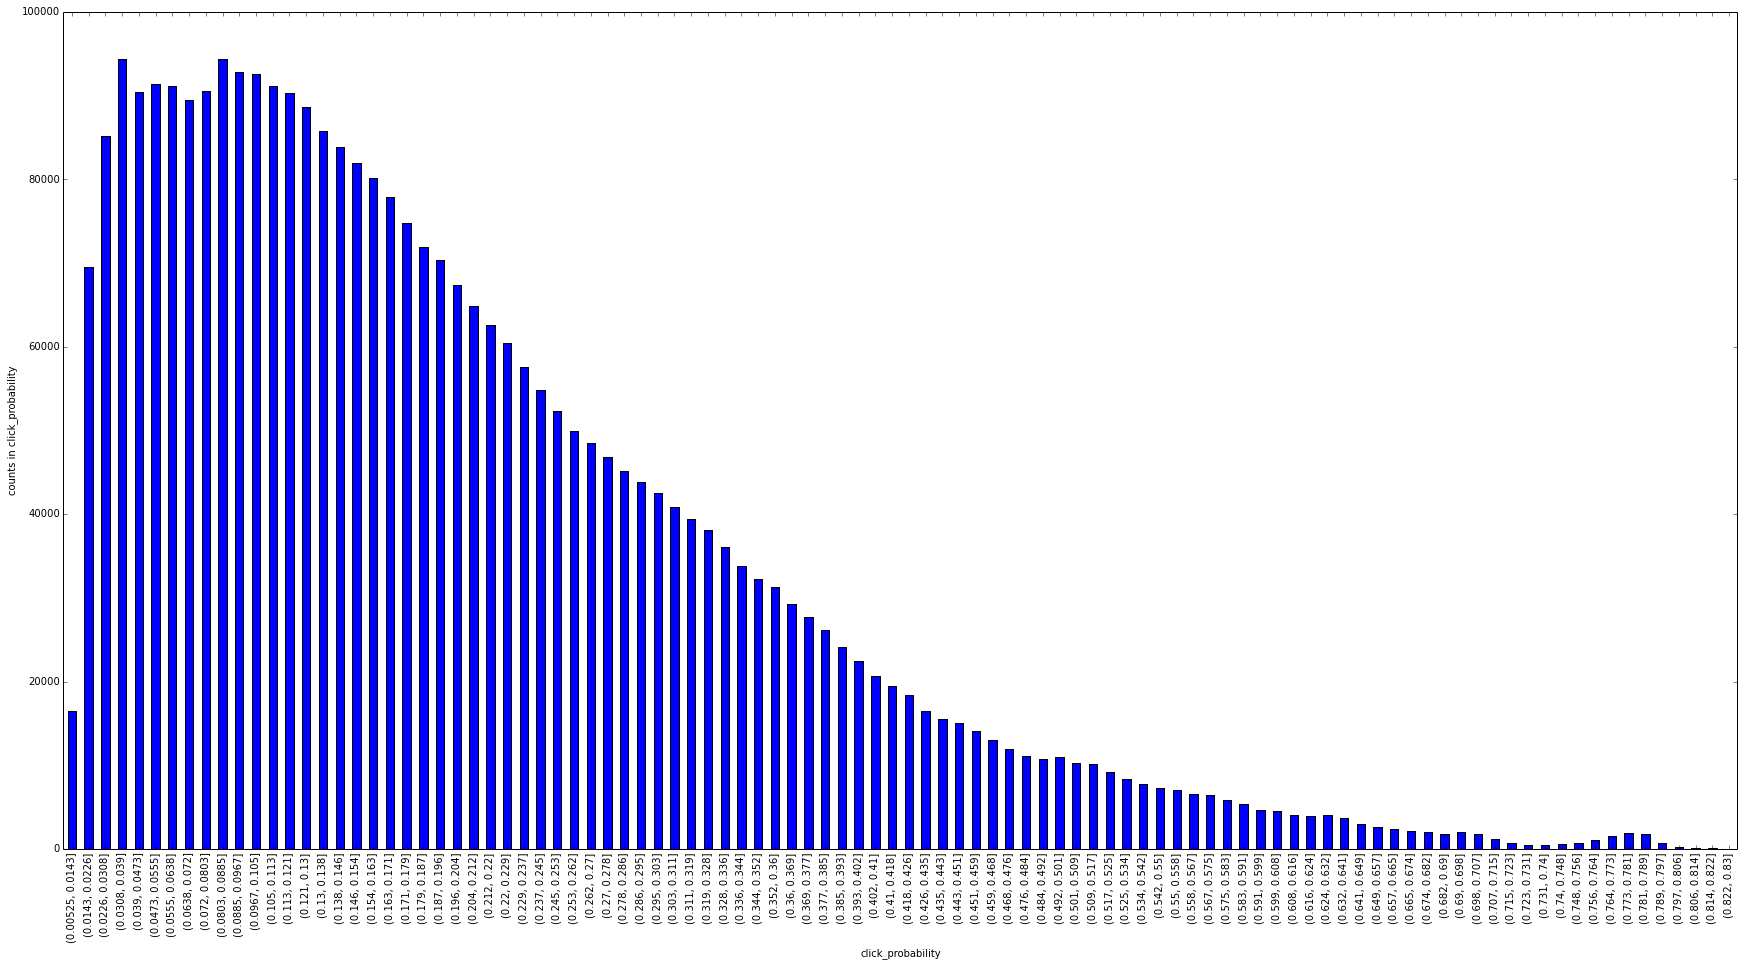

In [11]:
plot_data_cut(sub_lgbm_9, 'click_probability', 100)

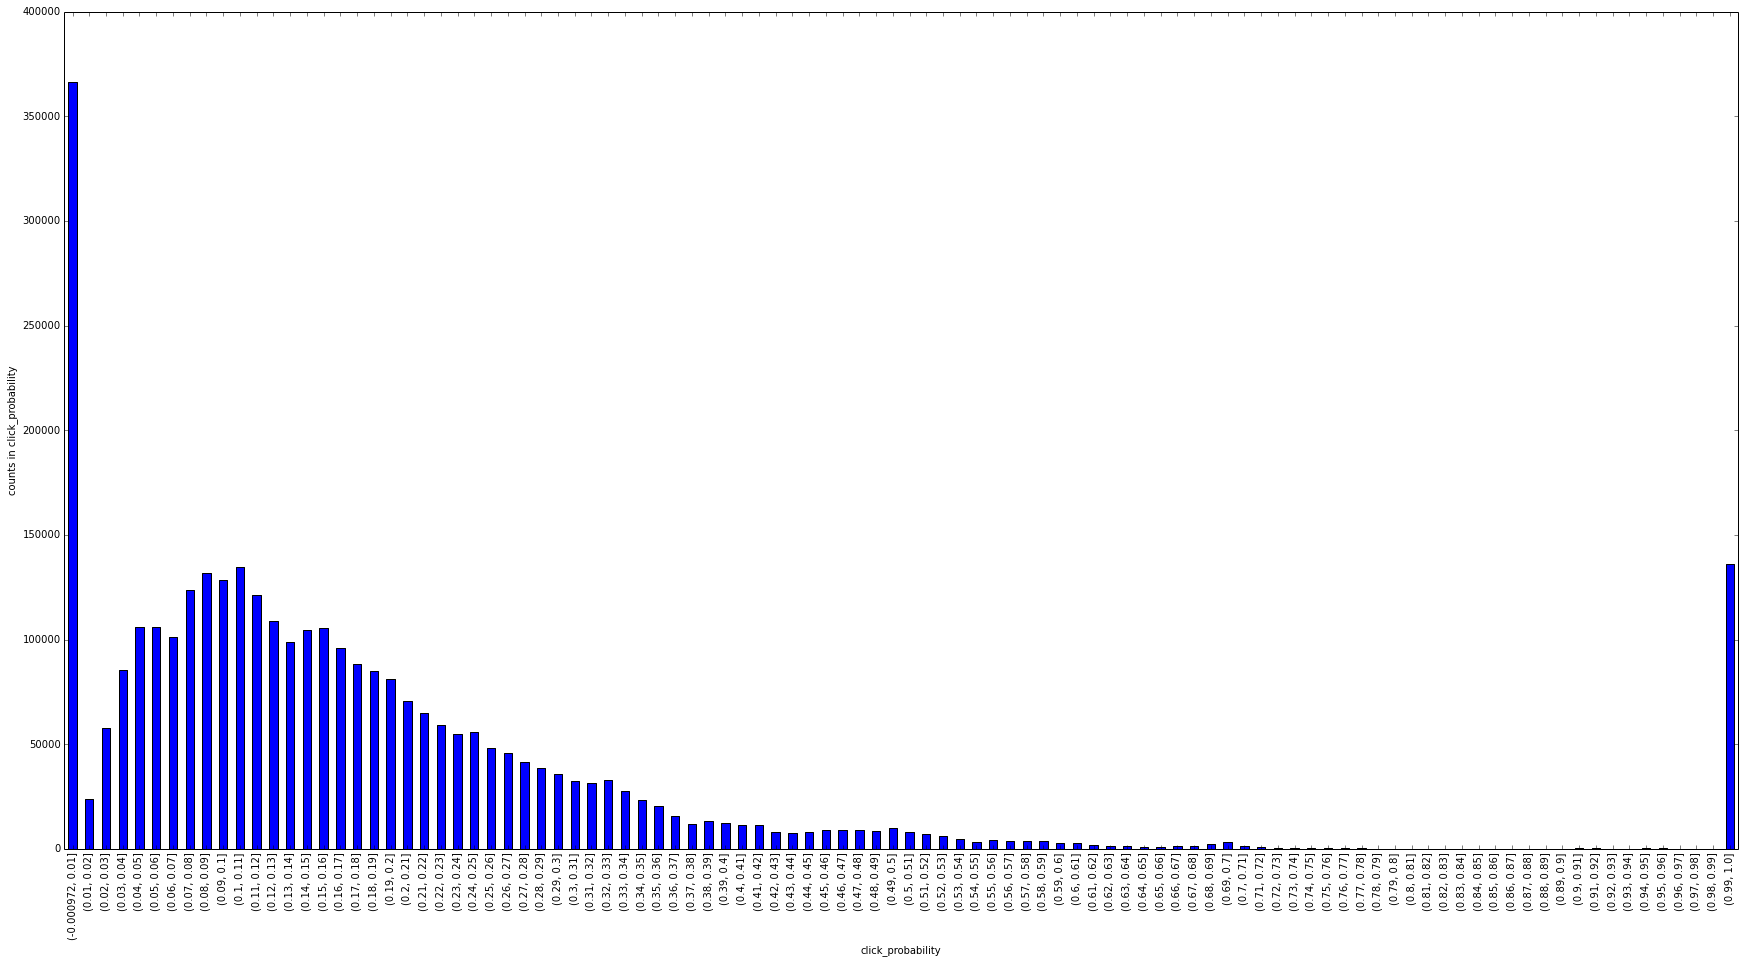

In [12]:
plot_data_cut(sub_lgbm_10, 'click_probability', 100)

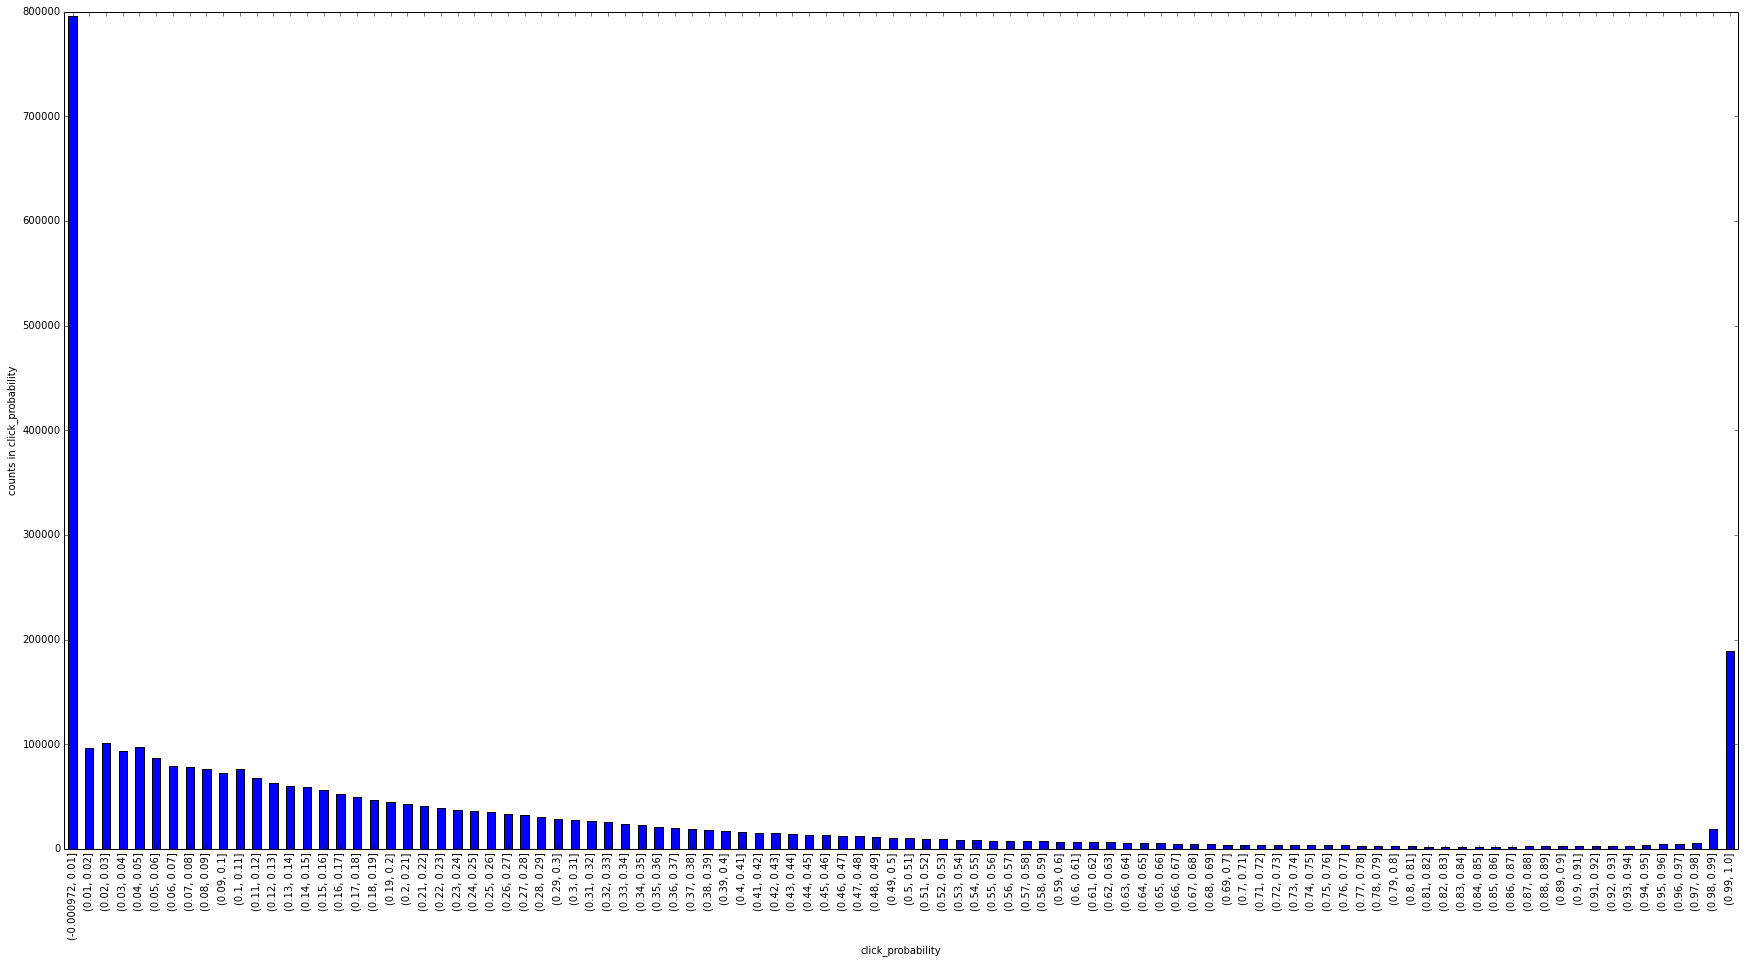

In [13]:
plot_data_cut(sub_lgbm_11, 'click_probability', 100)

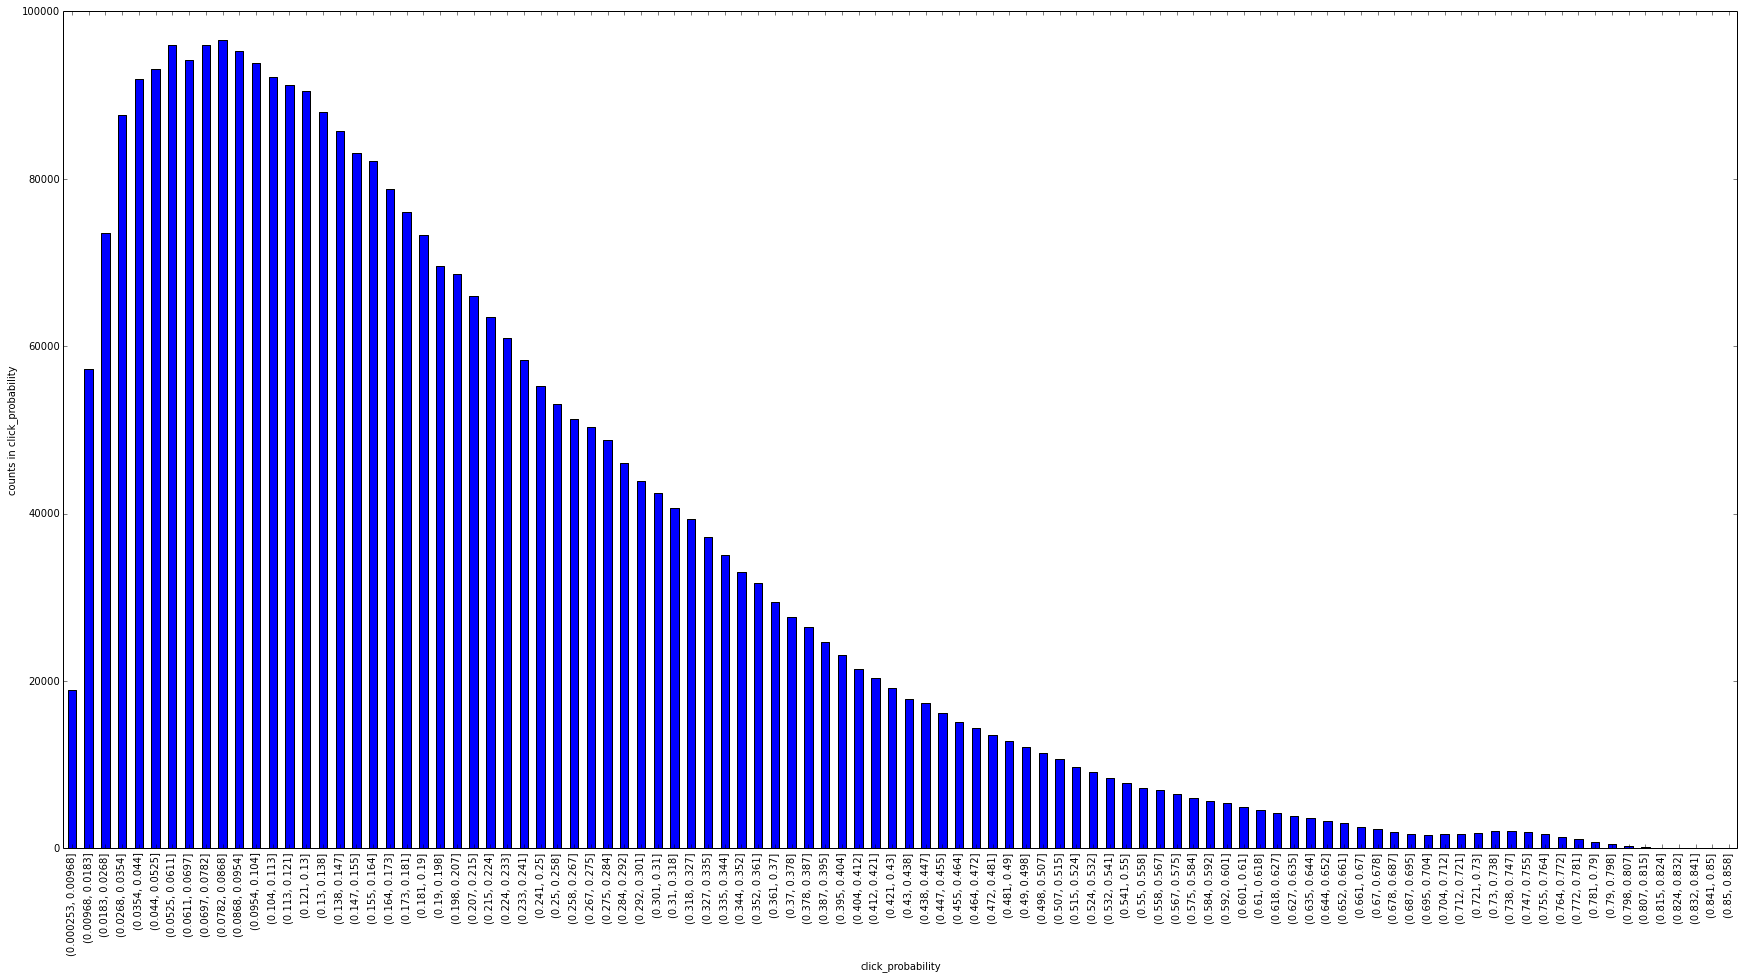

In [14]:
plot_data_cut(sub_catboost_1, 'click_probability', 100)

In [15]:
cols = ['user_id', 'photo_id', 'browse_num', 'click_num', 'like_num', 'follow_num', 'playing_sum', 'duration_sum', 'click_ratio', 'like_ratio', 'follow_ratio', 'playing_ratio', 'browse_time_diff', 'click_freq', 'browse_freq', 'playing_freq', 'man_favor', 'woman_favor', 'man_cv_favor', 'woman_cv_favor', 'man_age_favor', 'woman_age_favor', 'man_yen_value_favor', 'woman_yen_value_favor', 'face_click_favor', 'non_face_click_favor', 'cover_length_favor', 'exposure_num', 'have_face_cate', 'clicked_ratio', 'face_num', 'man_num', 'woman_num', 'man_scale', 'woman_scale', 'human_scale', 'man_avg_age', 'woman_avg_age', 'human_avg_age', 'man_avg_attr', 'woman_avg_attr', 'human_avg_attr', 'cover_length', 'time', 'duration_time', 'click']

In [16]:
ensemble_train = pd.read_csv('../data/features/ensemble_feature_train.csv',
                            sep='\t')

In [ ]:
ensemble_train.head()

In [ ]:
ensemble_train.info()

In [ ]:
ensemble_test = pd.read_csv('../data/features/ensemble_feature_test.csv',
                            sep='\t')

In [37]:
ensemble_test.head()

,user_id,photo_id,browse_num,click_num,like_num,follow_num,playing_sum,duration_sum,click_ratio,like_ratio,...,man_avg_age,woman_avg_age,human_avg_age,man_avg_attr,woman_avg_attr,human_avg_attr,cover_length,avg_tfidf,time_cate,duration_time_cate
0,2,8493743,304,50,0,3,1015,6088,0.167463,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4,0.000016,2,0
1,2,8676804,304,50,0,3,1015,6088,0.167463,0.0,...,0.0,27.0,27.0,0.0,54.0,54.0,7,0.000020,2,0
2,2,8389617,304,50,0,3,1015,6088,0.167463,0.0,...,0.0,6.0,6.0,0.0,45.0,45.0,6,0.000018,2,1
3,2,9080838,304,50,0,3,1015,6088,0.167463,0.0,...,0.0,16.0,16.0,0.0,81.0,81.0,8,0.000020,2,2
4,2,8962078,304,50,0,3,1015,6088,0.167463,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,9,0.000023,2,0


In [23]:
ensemble_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3291332 entries, 0 to 3291331
Data columns (total 43 columns):
user_id                  int64
photo_id                 int64
browse_num               int64
click_num                int64
like_num                 int64
follow_num               int64
playing_sum              int64
duration_sum             int64
click_ratio              float64
like_ratio               float64
follow_ratio             float64
playing_ratio            float64
browse_time_diff         int64
click_freq               float64
browse_freq              float64
playing_freq             float64
face_favor               float64
man_favor                float64
woman_favor              float64
man_cv_favor             float64
woman_cv_favor           float64
man_age_favor            float64
woman_age_favor          float64
man_yen_value_favor      float64
woman_yen_value_favor    float64
cover_length_favor       int64
exposure_num             int64
have_face_cate    

In [27]:
commons = ['exposure_num', 'click_ratio', 'woman_yen_value_favor', 'cover_length_favor', 'cover_length', 'browse_num', 'woman_cv_favor', 'man_age_favor', 'woman_age_favor', 'woman_scale', 'time', 'playing_sum', 'duration_time', 'man_cv_favor', 'woman_favor', 'click_num', 'playing_ratio', 'man_scale', 'man_yen_value_favor', 'human_scale', 'woman_avg_attr', 'man_avg_age', 'woman_avg_age', 'browse_freq', 'playing_freq', 'human_avg_attr', 'click_freq', 'browse_time_diff', 'duration_sum', 'man_favor', 'follow_ratio', 'man_avg_attr', 'human_avg_age', 'woman_num', 'like_ratio', 'follow_num', 'man_num', 'like_num', 'face_num', 'have_face_cate']

In [28]:
data = pd.concat([ensemble_train[commons], ensemble_test])

In [33]:
for col in commons:
    print(data[col].describe())

count    2.414568e+07
mean     1.876980e+02
std      3.092768e+02
min      1.000000e+00
25%      4.000000e+00
50%      4.600000e+01
75%      2.320000e+02
max      2.521000e+03
Name: exposure_num, dtype: float64
count    2.414568e+07
mean     2.038263e-01
std      1.254433e-01
min      1.022013e-02
25%      1.111943e-01
50%      1.773637e-01
75%      2.697023e-01
max      9.485792e-01
Name: click_ratio, dtype: float64
count    2.414568e+07
mean     1.369371e+01
std      7.893693e+00
min      0.000000e+00
25%      7.762897e+00
50%      1.218197e+01
75%      1.801568e+01
max      6.522712e+01
Name: woman_yen_value_favor, dtype: float64
count    2.414568e+07
mean     3.932175e+00
std      3.763455e+00
min      1.000000e+00
25%      1.000000e+00
50%      3.000000e+00
75%      5.000000e+00
max      6.600000e+01
Name: cover_length_favor, dtype: float64
count    2.414568e+07
mean     3.617865e+00
std      3.635518e+00
min      1.000000e+00
25%      1.000000e+00
50%      3.000000e+00
75%      5

count     24145676
unique           2
top          False
freq      14398837
Name: have_face_cate, dtype: object


In [55]:
uint64_cols = ['time']
uint32_cols = ['playing_sum', 'browse_time_diff', 'duration_sum']
uint16_cols = ['browse_num', 'exposure_num', 'click_num', 'duration_time', 'like_num', 'follow_num']
uint8_cols = ['cover_length', 'man_num', 'woman_num', 'face_num']
bool_cols = ['have_face_cate']
float64_cols = ['clicked_ratio','non_face_click_favor', 'face_click_favor', 'man_favor', 'woman_avg_age', 'playing_freq', 'woman_age_favor', 'woman_yen_value_favor', 'human_scale', 'woman_favor', 'click_freq', 'woman_cv_favor', 'man_age_favor', 'man_yen_value_favor', 'follow_ratio', 'man_scale', 'browse_freq', 'man_avg_age', 'man_cv_favor', 'man_avg_attr', 'playing_ratio', 'woman_scale', 'click_ratio', 'human_avg_age', 'woman_avg_attr', 'like_ratio', 'cover_length_favor', 'human_avg_attr']

In [56]:
len(uint64_cols + uint32_cols + uint16_cols + uint8_cols + bool_cols+float64_cols)


43

In [31]:
import numpy as np
int_types = ["uint8", "uint16", "uint32"]
for it in int_types:
    print(np.iinfo(it))

Machine parameters for uint8
---------------------------------------------------------------
min = 0
max = 255
---------------------------------------------------------------

Machine parameters for uint16
---------------------------------------------------------------
min = 0
max = 65535
---------------------------------------------------------------

Machine parameters for uint32
---------------------------------------------------------------
min = 0
max = 4294967295
---------------------------------------------------------------



# 内存优化
 - [用pandas处理大数据——节省90%内存消耗的小贴士](https://zhuanlan.zhihu.com/p/28531346)
 - [K 折交叉验证](https://www.szdev.com/blog/AI/model-selection-k-fold-cross-validation/)

In [16]:
import os  
from time import time  
import pandas as pd  
from memory_profiler import memory_usage

FILENAME='compressed_df'

def get_size(flnm):  
    return round(os.path.getsize(flnm) / (1024*1024), 2)

def store_df(original_df: pd.DataFrame, flnm: str, clib: str):  
    original_df.to_hdf(flnm, key='df', complib=clib, complevel=9)

def benchmark(original_df: pd.DataFrame):  
    res = {}
    for clib in ['zlib', 'lzo', 'bzip2', 'blosc', 'blosc:blosclz', 'blosc:lz4', 
                 'blosc:lz4hc', 'blosc:snappy', 'blosc:zlib', 'blosc:zstd']:
        flnm = f'{FILENAME}_{clib}.hdf'
        def strdf():
            return store_df(original_df, flnm, clib)
        started = time()
        memus = memory_usage(strdf, interval=1)
        res[clib] = {'time [s]': time() - started, 'size [MB]': get_size(flnm), 'memory_usage': memus}
    return res

SyntaxError: invalid syntax (<ipython-input-16-c63b58374d44>, line 11)

In [17]:
import numpy as np

n_features = 10

# Make some data
A = np.random.randn(3, n_features)
B = np.random.randn(5, n_features)
C = np.random.randn(4, n_features)
D = np.random.randn(7, n_features)
E = np.random.randn(9, n_features)

# Group it
K1 = np.concatenate([A, B])
K2 = np.concatenate([C, D])
K3 = E

data = np.concatenate([K1, K2, K3])

# Make some dummy prediction target
target = np.random.randn(len(data)) > 0

# Make the corresponding labels
labels = np.concatenate([[i] * len(K) for i, K in enumerate([K1, K2, K3])])

from sklearn.cross_validation import LeaveOneLabelOut, cross_val_score

cv = LeaveOneLabelOut(labels)

# Use some classifier in crossvalidation on data
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
scores = cross_val_score(lr, data, target, cv=cv)

/Library/Python/2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [18]:
# create train and test folds from our labels:
cv_by_hand = [(np.where(labels != label)[0], np.where(labels == label)[0])
               for label in np.unique(labels)]

# We check this against our existing cv by converting the latter to a list
cv_to_list = list(cv)

print cv_by_hand
print cv_to_list

# Check equality
for (train1, test1), (train2, test2) in zip(cv_by_hand, cv_to_list):
    assert (train1 == train2).all() and (test1 == test2).all()

# Use the created cv_by_hand in cross validation
scores2 = cross_val_score(lr, data, target, cv=cv_by_hand)


# assert equality again
assert (scores == scores2).all()

[(array([ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
       25, 26, 27]), array([0, 1, 2, 3, 4, 5, 6, 7])), (array([ 0,  1,  2,  3,  4,  5,  6,  7, 19, 20, 21, 22, 23, 24, 25, 26, 27]), array([ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18])), (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18]), array([19, 20, 21, 22, 23, 24, 25, 26, 27]))]
[(array([ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
       25, 26, 27]), array([0, 1, 2, 3, 4, 5, 6, 7])), (array([ 0,  1,  2,  3,  4,  5,  6,  7, 19, 20, 21, 22, 23, 24, 25, 26, 27]), array([ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18])), (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18]), array([19, 20, 21, 22, 23, 24, 25, 26, 27]))]


In [21]:
#coding:utf8

# must have one line in python3 between encoding and first import statement

import os
import gc
import json
import io
import argparse
import sys
sys.path.append("..")

import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn.externals import joblib
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import recall_score, accuracy_score
from lightgbm import LGBMClassifier

from conf.modelconf import user_action_features, face_features, user_face_favor_features, id_features, time_features, photo_features, user_features, y_label, features_to_train

from common.utils import read_data, store_data, normalize_min_max, normalize_z_score, FeatureMerger


USE_SAMPLE = True

model_name = 'LGBM'
fmt = 'csv'

feature_store_path = '../sample/features' if USE_SAMPLE else '../data/features'


col_feature_store_path = '../sample/features/columns' if USE_SAMPLE else '../data/features/columns'

feature_to_use = user_features + photo_features + time_features

fm_trainer = FeatureMerger(col_feature_store_path, feature_to_use+y_label, fmt=fmt, data_type='train', pool_type='process', num_workers=8)
fm_tester = FeatureMerger(col_feature_store_path, feature_to_use, fmt=fmt, data_type='test', pool_type='process', num_workers=8)

ensemble_train = fm_trainer.merge()
print(ensemble_train.info())
ensemble_test = fm_tester.merge()
print(ensemble_test.info())

all_features = list(ensemble_train.columns.values)
print("all original features")
print(all_features) 
y = ensemble_train[y_label].values

print("train features")
print(features_to_train)    

ensemble_offline = ensemble_train[features_to_train]
ensemble_online = ensemble_test[features_to_train]
# 决策树模型不需要归一化，本身就是范围划分

X = ensemble_offline.values
print(X.shape)
X_t = ensemble_online.values
print(X_t.shape)



('browse_num', 'uint16')
('click_num', 'uint16')
('like_num', 'uint16')
('follow_num', 'uint16')
('duration_sum', 'uint32')
('playing_sum', 'uint32')
('click_ratio', 'float32')
('like_ratio', 'float32')
('browse_time_diff', 'uint32')
('playing_ratio', 'float32')
('follow_ratio', 'float32')
('click_freq', 'float32')
('browse_freq', 'float32')
('playing_freq', 'float32')
('man_favor', 'float32')
('woman_favor', 'float32')
('man_cv_favor', 'float32')
('woman_cv_favor', 'float32')
('man_age_favor', 'float32')
('woman_age_favor', 'float32')
('man_yen_value_favor', 'float32')
('woman_yen_value_favor', 'float32')
('face_click_favor', 'float32')
('non_face_click_favor', 'float32')
('cover_length_favor', 'float32')
('exposure_num', 'uint16')
('have_face_cate', 'bool')
('face_num', 'uint8')
('man_num', 'uint8')
('woman_num', 'uint8')
('man_scale', 'float32')
('woman_scale', 'float32')
('human_scale', 'float32')
('man_avg_age', 'float32')
('human_avg_age', 'float32')
('woman_avg_age', 'float32')


(3120901, 43)
(489929, 43)


In [22]:
ensemble_train.head()

,user_id,photo_id,browse_num,click_num,like_num,follow_num,playing_sum,duration_sum,click_ratio,like_ratio,...,woman_avg_age,human_avg_age,man_avg_attr,woman_avg_attr,human_avg_attr,cover_length,avg_tfidf,time_cate,duration_time_cate,click
0,2,528031,304,50,0,3,1015,6088,0.167463,0.0,...,22.0,22.0,0.0,66.0,66.0,13,0.000024,9,0,False
1,2,3141045,304,50,0,3,1015,6088,0.167463,0.0,...,0.0,0.0,0.0,0.0,0.0,5,0.000017,9,0,False
2,2,6410672,304,50,0,3,1015,6088,0.167463,0.0,...,0.0,0.0,0.0,0.0,0.0,2,0.000011,9,0,False
3,2,6031965,304,50,0,3,1015,6088,0.167463,0.0,...,0.0,0.0,0.0,0.0,0.0,4,0.000016,10,0,False
4,2,492513,304,50,0,3,1015,6088,0.167463,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.000000,8,0,False


In [ ]:
print('Training model %s......' % model_name)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

print(y_train.mean(), y_train.std())
print(y_test.mean(), y_test.std())

In [32]:
clf = LGBMClassifier(verbose=1)
clf.fit(X_train, y_train.ravel())
# KFold cross validation
print('StratifiedKFold cross validation......')
cv = StratifiedKFold(n_splits=2, random_state=0, shuffle=False)
scores = cross_val_score(clf, X_train, y_train.ravel(), cv=cv, scoring='roc_auc')
print('K Fold scores: %s' % scores)
print("Accuracy: %0.6f (+/- %0.6f)" % (scores.mean(), scores.std() ** 2))
roc_auc = scores.mean()

acc = accuracy_score(y_test, clf.predict(X_test))
recall = recall_score(y_test, clf.predict(X_test), average='macro')
print("{:31} 测试集acc/recall: {:15}/{:15}".format(model_name, acc, recall))


StratifiedKFold cross validation......
K Fold scores: [0.75197899 0.7515352 ]
Accuracy: 0.751757 (+/- 0.000000)


/Library/Python/2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Python/2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


LGBM                            测试集acc/recall:  0.807056621141/ 0.556886439672
